## Install necessary libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Libraries and packages installed

## Read data

In [3]:
data = pd.read_csv('big_data_1.csv')
data

,year,month,day,irradiance
0,2020,8,1,4.57
1,2020,8,2,6.30
2,2020,8,3,4.96
3,2020,8,4,5.42
4,2020,8,5,3.24
...,...,...,...,...
5835,2008,7,27,3.73
5836,2008,7,28,6.31
5837,2008,7,29,7.11
5838,2008,7,30,5.97


In [5]:
data.describe()

,year,month,day,irradiance
count,5840.000000,5840.000000,5840.000000,5840.000000
mean,2015.500000,6.526027,15.720548,4.804854
std,4.610167,3.448147,8.797000,1.540217
min,2008.000000,1.000000,1.000000,0.510000
25%,2011.750000,4.000000,8.000000,3.630000
50%,2015.500000,7.000000,16.000000,4.840000
75%,2019.250000,10.000000,23.000000,6.040000
max,2023.000000,12.000000,31.000000,8.340000


### The dataset consists of only numerical features and target. No null/missing values. 

## Preprocessing

In [6]:
ss_features = StandardScaler()
ss_target = StandardScaler()

In [8]:
features = data.iloc[:,1:3]
target = data['irradiance']

In [9]:
features

,month,day
0,8,1
1,8,2
2,8,3
3,8,4
4,8,5
...,...,...
5835,7,27
5836,7,28
5837,7,29
5838,7,30


In [38]:
scaled_features = ss_features.fit_transform(features)
scaled_target = ss_target.fit_transform((np.array(target)).reshape(-1,1))

In [39]:
scaled_features_df = pd.DataFrame(scaled_features)
scaled_target_df = pd.DataFrame(scaled_target)
final_data = pd.concat([scaled_features_df, scaled_target_df], axis = 1)
final_data.columns = ['month', 'date', 'irradiance']

In [40]:
final_data

,month,date,irradiance
0,0.427505,-1.673503,-0.152494
1,0.427505,-1.559818,0.970820
2,0.427505,-1.446134,0.100738
3,0.427505,-1.332449,0.399423
4,0.427505,-1.218764,-1.016083
...,...,...,...
5835,0.137469,1.282303,-0.697919
5836,0.137469,1.395988,0.977313
5837,0.137469,1.509672,1.496765
5838,0.137469,1.623357,0.756546


### Data standardization completed

## Feature correlation

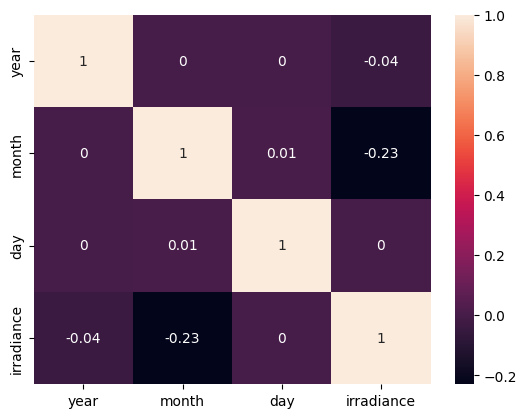

In [41]:
corr1 = round(data.corr(),2)
sns.heatmap(corr1, annot = True)
plt.show()

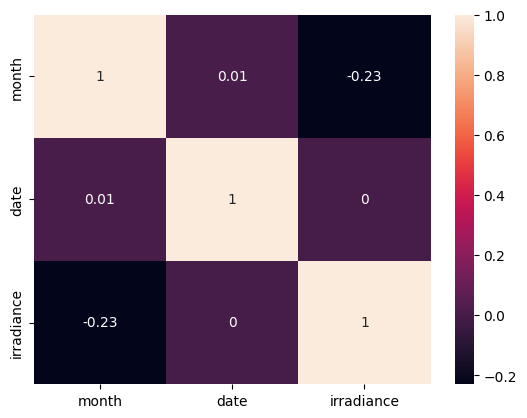

In [42]:
corr2 = round(final_data.corr(),2)
sns.heatmap(corr2, annot = True)
plt.show()

### 'Month' is highly linearly-inversely-correlated with 'irradiance'

## Model training

In [43]:
x = final_data.iloc[:,:2]
y = final_data['irradiance']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

## Comparing Models:
### 1. Linear Regression
### 2. K-Nearest Neighbors
### 3. Decision Trees
### 4. Random Forest
### 5. XGBoost 

In [54]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
print(rmse)
y_actual = ss_target.inverse_transform((np.array(y_test)).reshape(-1,1))
y_predicted_lr = ss_target.inverse_transform((np.array(y_pred_lr)).reshape(-1,1))
rmse = mean_squared_error(y_actual, y_predicted_lr, squared=False)
print(rmse)

0.9687450327283306
1.4919495064283275


c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
print(rmse)
y_actual = ss_target.inverse_transform((np.array(y_test)).reshape(-1,1))
y_predicted_knn = ss_target.inverse_transform((np.array(y_pred_knn)).reshape(-1,1))
rmse = mean_squared_error(y_actual, y_predicted_knn, squared=False)
print(rmse)

0.6728351639471395
1.0362232133788576


c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
print(rmse)
y_actual = ss_target.inverse_transform((np.array(y_test)).reshape(-1,1))
y_predicted_dtr = ss_target.inverse_transform((np.array(y_pred_dtr)).reshape(-1,1))
rmse = mean_squared_error(y_actual, y_predicted_dtr, squared=False)
print(rmse)

0.6355896642889705
0.978861985239002


c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(rmse)
y_actual = ss_target.inverse_transform((np.array(y_test)).reshape(-1,1))
y_predicted_rf = ss_target.inverse_transform((np.array(y_pred_rf)).reshape(-1,1))
rmse = mean_squared_error(y_actual, y_predicted_rf, squared=False)
print(rmse)

0.6352295824020452
0.9783074285957964


c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(rmse)
y_actual = ss_target.inverse_transform((np.array(y_test)).reshape(-1,1))
y_predicted_xgb = ss_target.inverse_transform((np.array(y_pred_xgb)).reshape(-1,1))
rmse = mean_squared_error(y_actual, y_predicted_xgb, squared=False)
print(rmse)

0.6345851719527997
0.9773149883638631


c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Bhavya Prakash\OneDrive\Desktop\Ezinore\Sparko\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBRegressor performs best with RMSE of 0.9773